In [21]:
!pip install squarify
!pip install tensorflow
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from colorama import Fore, Back, Style

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import squarify
from collections import Counter

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import warnings
warnings.filterwarnings("ignore")


In [22]:
data = pd.read_csv("D:\\StudentsPerformance.csv")
df_student = data.copy(deep=True)

In [24]:
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data['score'] = ((data['math score']+ data['reading score'] + data['writing score'])/ 3).round(2)

In [ ]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='viridis')\
                             .background_gradient(subset=['50%'], cmap='mako')

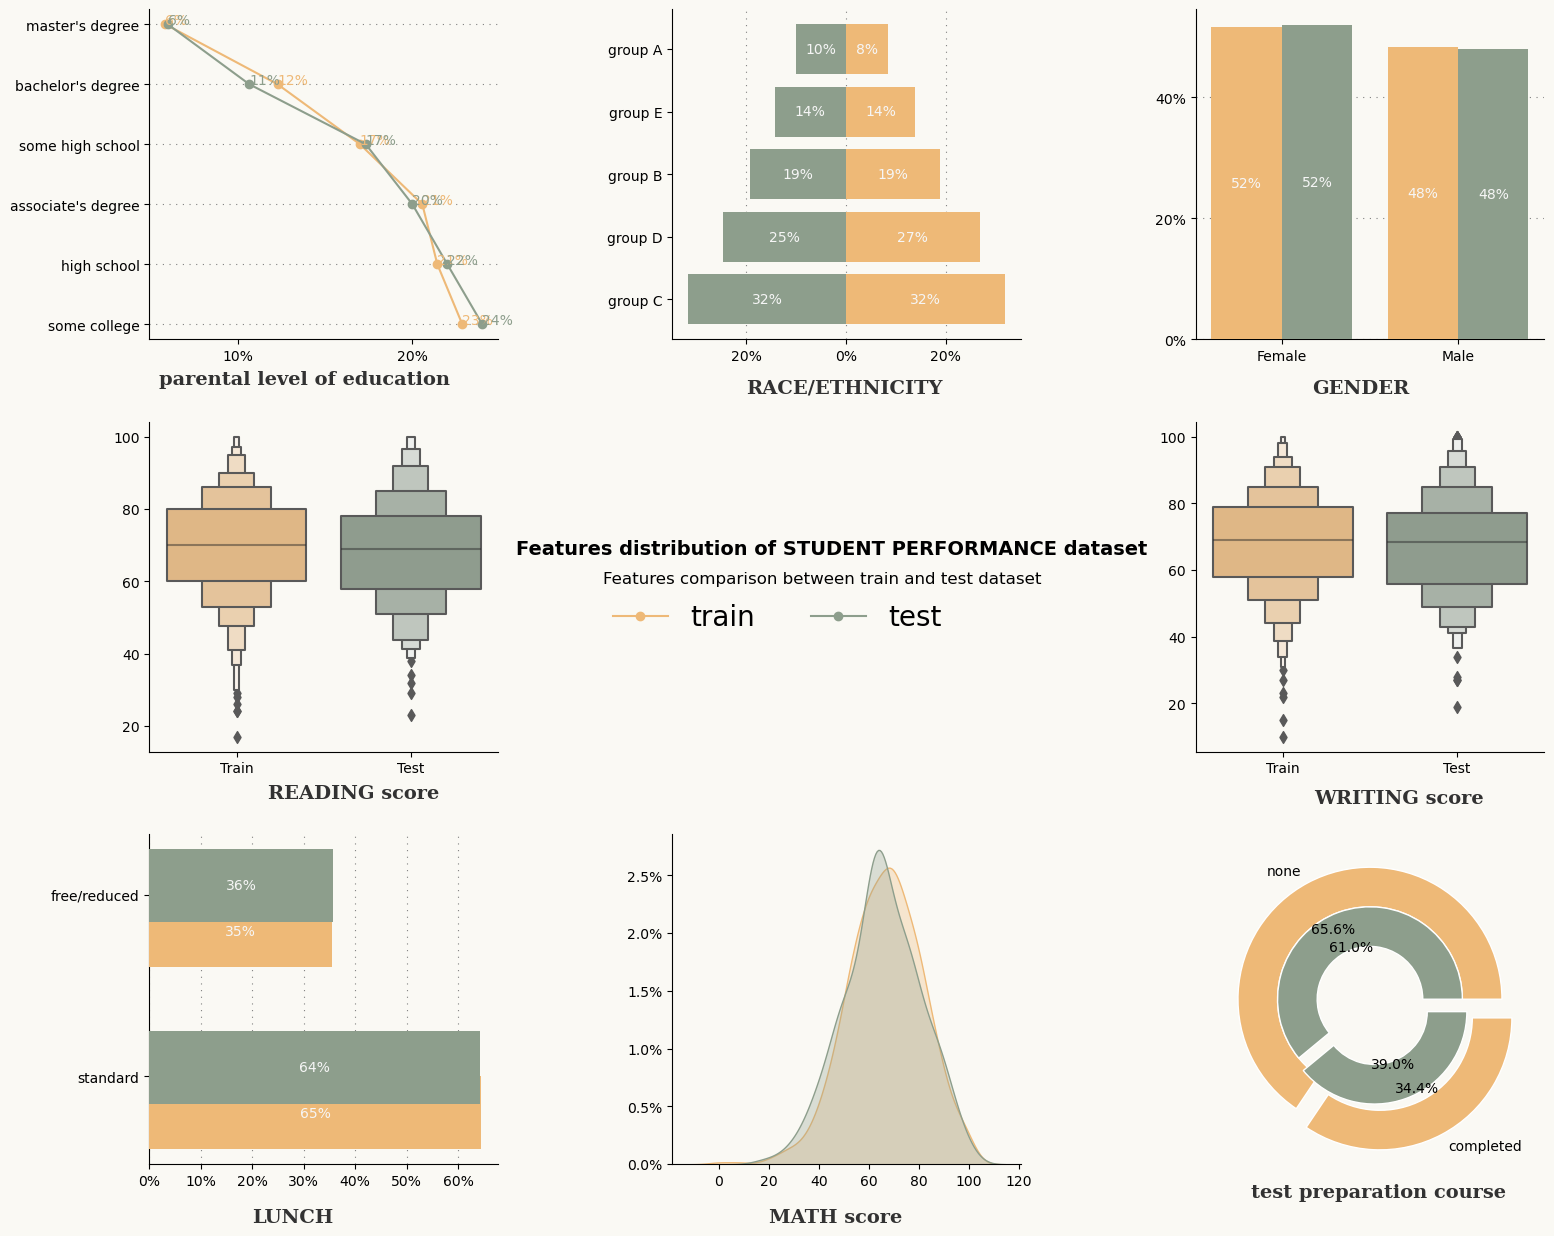

In [11]:
train,test=train_test_split(data,test_size=0.3)

fig = plt.figure(figsize=(18,15),facecolor='#faf9f4')
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.5, hspace=0.25)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)

# Ax0 - parental level of education
train_graph_temp_df = pd.DataFrame(train["parental level of education"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["parental level of education"].apply(lambda x: x/sum(train_graph_temp_df["parental level of education"])*100)
test_graph_temp_df = pd.DataFrame(test["parental level of education"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["parental level of education"].apply(lambda x: x/sum(test_graph_temp_df["parental level of education"])*100)

ax0.grid(color='gray',axis='y',zorder=2,dashes=(1,5))
ax0.plot( train_graph_temp_df["Percentage"],np.arange(len(train_graph_temp_df.index)), zorder=3, color="#eeb977", marker='o')
ax0.plot(test_graph_temp_df["Percentage"],np.arange(len(test_graph_temp_df.index)),  zorder=3, color="#8d9e8c", marker='o')
ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_yticklabels(['','some college','high school',"associate's degree", 'some high school',   "bachelor's degree", "master's degree"])
ax0.set_xticklabels(['','10%','20%'])
ax0.text(5.5,-1,'parental level of education',fontfamily='serif',fontsize=14, fontweight='bold',color="#323232")
for i,j in zip([0,1,2,3,4,5], train_graph_temp_df["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(j,i), color='#eeb977')
for i,j in zip([0,1,2,3,4,5], test_graph_temp_df["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(j,i), color='#8d9e8c')
    

# Ax1 - Race/Ethnicity
train_graph_temp_df = pd.DataFrame(train["race/ethnicity"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["race/ethnicity"].apply(lambda x: x/sum(train_graph_temp_df["race/ethnicity"])*100)
test_graph_temp_df = pd.DataFrame(test["race/ethnicity"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["race/ethnicity"].apply(lambda x: x/sum(test_graph_temp_df["race/ethnicity"])*100)

ax1.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax1.barh(['group C','group D',  'group B',    'group E',  'group A' ], train_graph_temp_df["Percentage"], zorder=3, color="#eeb977")
ax1.barh(['group C','group D',  'group B',    'group E',  'group A'], test_graph_temp_df["Percentage"]*-1, zorder=3, color="#8d9e8c")
ax1.text(-20, -1.5, 'RACE/ETHNICITY', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(20))
ax1.set_xticklabels(["40%", "20%", "0%", "20%", "40%"])
for i,j in zip(['group C','group D',  'group B',    'group E',  'group A'], train_graph_temp_df["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=(j/2,i), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip(['group C','group D',  'group B',    'group E',  'group A'], test_graph_temp_df["Percentage"]):
    ax1.annotate(f'{j:0.0f}%',xy=((j*-1)/2,i), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    
# Ax2 - Gender
train_graph_temp_df = pd.DataFrame(train["gender"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["gender"].apply(lambda x: x/sum(train_graph_temp_df["gender"])*100)
test_graph_temp_df = pd.DataFrame(test["gender"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["gender"].apply(lambda x: x/sum(test_graph_temp_df["gender"])*100)

x = np.arange(len(train_graph_temp_df))
ax2.text(0.37, -9, 'GENDER', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#eeb977", width=0.4)
ax2.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(["Female", "Male"])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
 

# Ax3 - READING score
train_graph_temp_df = pd.DataFrame(train["reading score"])
train_graph_temp_df["TrainTest"] = "Train"
test_graph_temp_df = pd.DataFrame(test["reading score"])
test_graph_temp_df["TrainTest"] = "Test"
ax3.text(0.18,0, 'READING score', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
comb_graph_temp_df = pd.concat([train_graph_temp_df, test_graph_temp_df], axis=0)
sns.boxenplot(ax=ax3, y="reading score", x="TrainTest", data=comb_graph_temp_df, palette=["#eeb977", "#8d9e8c"])
ax3.set_xlabel("")
ax3.set_ylabel("")


# Ax4 - Heading
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(-0.45, 0.6, 'Features distribution of STUDENT PERFORMANCE dataset', fontsize=14, fontweight='bold')
ax4.text(-0.2, 0.51, 'Features comparison between train and test dataset', fontsize=12)
for s in ["top","right","left","bottom"]:
    ax4.spines[s].set_visible(False)
ax4.tick_params(left=False, bottom=False)


# Ax5 - WRITING score
train_graph_temp_df = pd.DataFrame(train["writing score"])
train_graph_temp_df["TrainTest"] = "Train"
test_graph_temp_df = pd.DataFrame(test["writing score"])
test_graph_temp_df["TrainTest"] = "Test"
ax5.text(0.18,-10, 'WRITING score', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
comb_graph_temp_df = pd.concat([train_graph_temp_df, test_graph_temp_df], axis=0)
sns.boxenplot(ax=ax5, y="writing score", x="TrainTest", data=comb_graph_temp_df, palette=["#eeb977", "#8d9e8c"])
ax5.set_xlabel("")
ax5.set_ylabel("")


# Ax6 - Lunch
train_graph_temp_df = pd.DataFrame(train["lunch"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["lunch"].apply(lambda x: x/sum(train_graph_temp_df["lunch"])*100)
test_graph_temp_df = pd.DataFrame(test["lunch"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["lunch"].apply(lambda x: x/sum(test_graph_temp_df["lunch"])*100)

ax6.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax6.barh(np.arange(len(train_graph_temp_df.index)), train_graph_temp_df["Percentage"], zorder=3, color="#eeb977", height=0.4)
ax6.barh(np.arange(len(test_graph_temp_df.index))+0.25, test_graph_temp_df["Percentage"], zorder=3, color="#8d9e8c", height=0.4)
ax6.xaxis.set_major_formatter(mtick.PercentFormatter())
ax6.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax6.set_yticks(np.arange(len(test_graph_temp_df.index))+0.4 / 2)
ax6.set_yticklabels(list(test_graph_temp_df.index))
ax6.text(20,-0.6, 'LUNCH', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
for i,j in zip(train_graph_temp_df["Percentage"],[0, 1]):
    ax6.annotate(f'{i:0.0f}%',xy=(i/2, j), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip(test_graph_temp_df["Percentage"],[0, 1]):
    ax6.annotate(f'{i:0.0f}%',xy=(i/2, j+0.25), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    
# Ax7 - MATH score
train_graph_temp_df = pd.DataFrame(train["math score"])
train_graph_temp_df["Percentage"] = train_graph_temp_df["math score"].apply(lambda x: x/sum(train_graph_temp_df["math score"])*100)
test_graph_temp_df = pd.DataFrame(test["math score"])
test_graph_temp_df["Percentage"] = test_graph_temp_df["math score"].apply(lambda x: x/sum(test_graph_temp_df["math score"])*100)

ax7.text(20,-0.005, 'MATH score', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
comb_graph_temp_df = pd.concat([train_graph_temp_df, test_graph_temp_df], axis=0)
sns.kdeplot(train_graph_temp_df["math score"], color="#eeb977", alpha=0.3, shade=True, label="train", ax=ax7)#0.8
sns.kdeplot(test_graph_temp_df["math score"], color="#8d9e8c", alpha=0.3, shade=True, label="test", ax=ax7)#0.8
ax7.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=1))
ax7.set_xlabel("")
ax7.set_ylabel("")


# Ax8 - test preparation course
train_graph_temp_df = pd.DataFrame(train["test preparation course"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["test preparation course"].apply(lambda x: x/sum(train_graph_temp_df["test preparation course"])*100)
test_graph_temp_df = pd.DataFrame(test["test preparation course"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["test preparation course"].apply(lambda x: x/sum(test_graph_temp_df["test preparation course"])*100)
size = 0.3
ax8.pie(train_graph_temp_df["Percentage"],autopct='%1.1f%%', explode=(0,0.16), labels=['none','completed'], radius=1, colors=['#eeb977'],wedgeprops=dict(width=size, edgecolor='w'))
ax8.pie(test_graph_temp_df["Percentage"],autopct='%1.1f%%', explode=(0,0.1), radius=1-size, colors=['#8d9e8c'],wedgeprops=dict(width=size, edgecolor='w'))
ax8.text(-0.9, -1.5, 'test preparation course', fontsize=14,fontweight='bold', fontfamily='serif', color="#323232")


for s in ["top","right"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

fig.legend(['train','test'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=20,loc='center')#bbox_to_anchor=(0.24, 0.91)
plt.show()

In [12]:
for i in data.columns:
    if (len(data[i].value_counts())<10):
        print(data[i].value_counts())
        print('*'*90)
        

female    518
male      482
Name: gender, dtype: int64
******************************************************************************************
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
******************************************************************************************
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
******************************************************************************************
standard        645
free/reduced    355
Name: lunch, dtype: int64
******************************************************************************************
none         642
completed    358
Name: test preparation course, dtype: int64
******************************************************************************************


In [10]:
fig = px.density_heatmap(data, x="writing score", y="reading score", marginal_x="box", marginal_y="violin")
fig.update_layout(title='Density HeatMap between Writing Score and Reading Score of the students')
iplot(fig)

In [11]:
x_data = np.unique(data['race/ethnicity'])

ya,yb,yc,yd,ye=[],[],[],[],[]

for i in range(len(data)):
    if data['race/ethnicity'][i] =='group C':
        yc.append(data['math score'][i])
    elif data['race/ethnicity'][i] == 'group D':
        yd.append(data['math score'][i])
    elif data['race/ethnicity'][i] == 'group B':
        yb.append(data['math score'][i])
    elif data['race/ethnicity'][i] == 'group E':
        ye.append(data['math score'][i])
    else:
        ya.append(data['math score'][i])


y_data = [ya,yb,yc,yd,ye]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            notched=True,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1))
        
fig.update_layout(
    title='math Score of the students based on race/ethnicity ',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

iplot(fig)



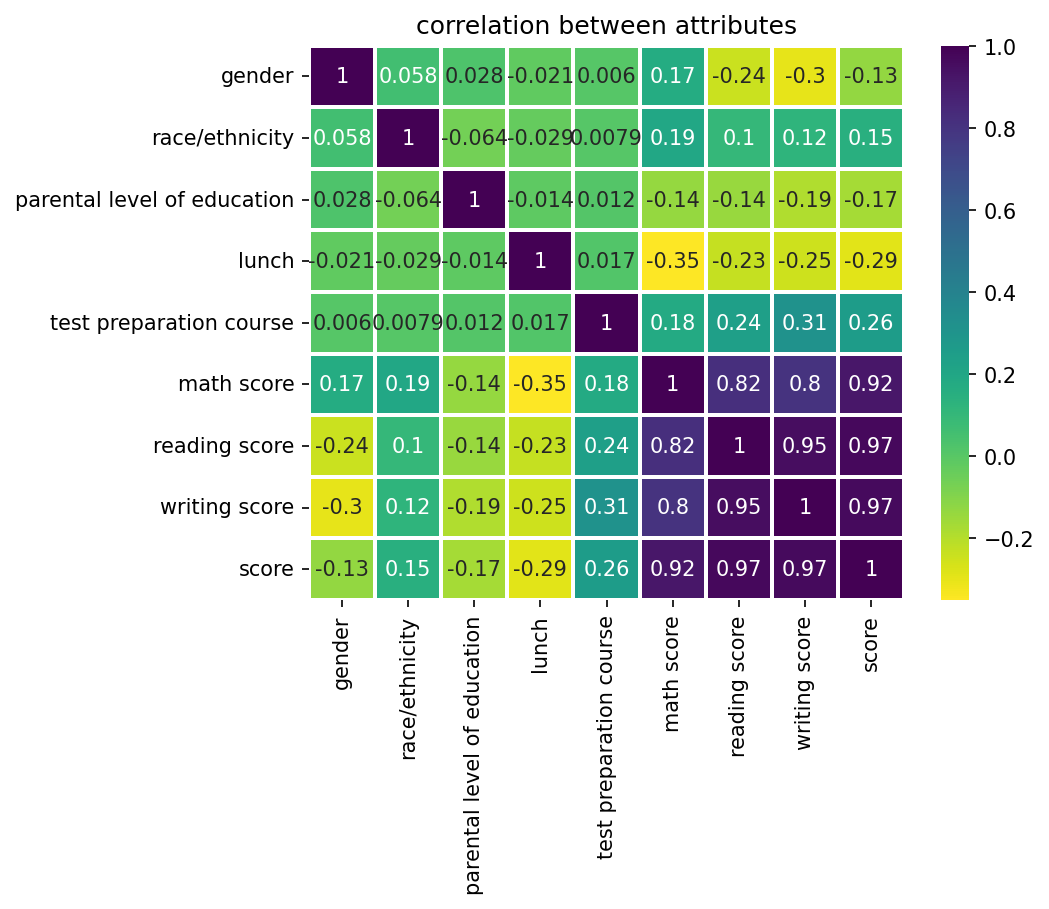

In [15]:
for i in list(data.columns):
    if data[i].dtype == 'object':
        data[i]=pd.factorize(data[i])[0]

plt.figure(dpi=150)
plt.title('correlation between attributes')
sns.heatmap(data.corr(),annot=True,lw=1,linecolor='white',cmap='viridis_r')
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [3]:
pd.options.mode.chained_assignment = None

data['score'] = ((data['math score']+ data['reading score'] + data['writing score'])/ 3).round(2)
for i in range(len(data.score)):
    if data.score[i] >= 80:
        data.score[i] = 'excellent'
    elif data.score[i] >= 70:
        data.score[i] = 'good'
    elif data.score[i] >= 60:
        data.score[i] = 'satisfactory'
    elif data.score[i] < 60:
        data.score[i] = 'need support'
        
df_student['grade'] = data['score']

fig = px.histogram(df_student, x="grade", y="math score", color="gender", facet_col="race/ethnicity",marginal="box")
iplot(fig)



NameError: name 'pd' is not defined

In [17]:
data['score'] = ((data['math score']+ data['reading score'] + data['writing score'])/ 3).round(2)

In [18]:
x_train,x_val,y_train,y_val = train_test_split(data[['math score','reading score','writing score']],data.score)

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Assuming you have loaded the features (x_train) and target variable (y_train)
# Split the data into training and testing sets (if not already done)
# x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, kernel_initializer='normal', activation='relu', input_dim=3),
    tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=1e-6), loss='mse', metrics=["mae"])

# Display model summary
model.summary()

# Train the model
# Assuming x_train and y_train are already defined
# history = model.fit(x_train, y_train, epochs=50)

# If you haven't split the data yet, you can


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
pred = model.predict(x_val)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [22]:


print('Accuracy score    : ',r2_score(pred,y_val)*100)
print('mean square error : ',mean_squared_error(pred,y_val))



Accuracy score    :  -158680847.3062545
mean square error :  4760.6744846712745
